<a href="https://colab.research.google.com/github/ChnssA/fundamentals-of-ai/blob/main/AI_lab_3_and_3b_Search_Strategy_25010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Implement uniform cost search strategy
 to find the shortest path from vertex v1 to v6.
Calculate the total cost required.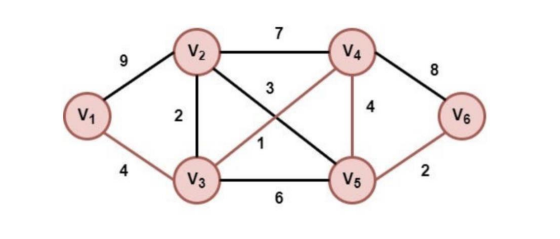

In [ ]:
graph = {
    'v1': [('v2', 9), ('v3', 4)],
    'v2': [('v4', 7), ('v3', 2), ('v5', 3)],
    'v3': [('v5', 6), ('v2', 2)],
    'v4': [('v6', 8), ('v5', 4)],
    'v5': [('v6', 2)],
    'v6': []
}
def find_all_paths(graph, current, goal, path, cost, all_paths):# Add current node to path
    path = path + [current]
    if current == goal:
        all_paths.append((path, cost))
        return
    for neighbor, weight in graph[current]:
        if neighbor not in path:  # Avoid cycles
            find_all_paths(graph, neighbor, goal, path, cost + weight, all_paths)# Collect all possible paths and their costs
all_paths = []
find_all_paths(graph, 'v1', 'v6', [], 0, all_paths)# Find the path with the minimal cost
if all_paths:
    min_path, min_cost = min(all_paths, key=lambda x: x[1])
    print("Shortest path from v1 to v6:")
    print(" -> ".join(min_path))
    print("Total cost required:", min_cost)
else:
    print("No path found from v1 to v6.")

Shortest path from v1 to v6:
v1 -> v3 -> v2 -> v5 -> v6
Total cost required: 11


#2. Recall the Romania example we discussed in class.
Given the heuristic measures from
each city to Bucharest. Find the shortest path from Arad to Bucharest. Apply Best First
Search algorithm to the following graph and find out the shortest path

```
Arad        366     Mehadia        241
Bucharest   0       Neamt          234
Craiova     160O    radea          380
Drobeta     242     Pitesti        100
Eforie      161     Rimnicu Vilcea 193
Fagaras     176     Sibiu          253
Giurgiu     77      Timisoara      329
Hirsova     151     Urziceni       80
Iasi        226     Vaslui         199
Lugoj       244     Zerind         374
```

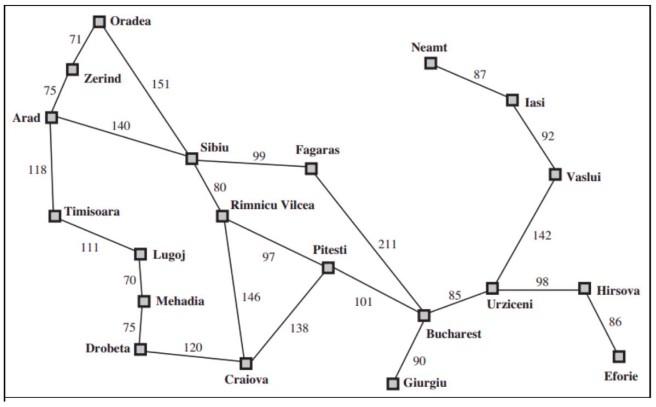

In [ ]:
# Romania map connections and distances
romania_map = {
    'Arad':            {'Zerind': 75, 'Sibiu': 140, 'Timisoara': 118},
    'Zerind':          {'Arad': 75, 'Oradea': 71},
    'Oradea':          {'Zerind': 71, 'Sibiu': 151},
    'Sibiu':           {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
    'Fagaras':         {'Sibiu': 99, 'Bucharest': 211},
    'Rimnicu Vilcea':  {'Sibiu': 80, 'Pitesti': 97, 'Craiova': 146},
    'Timisoara':       {'Arad': 118, 'Lugoj': 111},
    'Lugoj':           {'Timisoara': 111, 'Mehadia': 70},
    'Mehadia':         {'Lugoj': 70, 'Drobeta': 75},
    'Drobeta':         {'Mehadia': 75, 'Craiova': 120},
    'Craiova':         {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
    'Pitesti':         {'Craiova': 138, 'Rimnicu Vilcea': 97, 'Bucharest': 101},
    'Bucharest':       {'Fagaras': 211, 'Pitesti': 101, 'Giurgiu': 90, 'Urziceni': 85},
    'Giurgiu':         {'Bucharest': 90},
    'Urziceni':        {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
    'Hirsova':         {'Urziceni': 98, 'Eforie': 86},
    'Eforie':          {'Hirsova': 86},
    'Vaslui':          {'Urziceni': 142, 'Iasi': 92},
    'Iasi':            {'Vaslui': 92, 'Neamt': 87},
    'Neamt':           {'Iasi': 87}
}
heuristic = {
    'Arad': 366, 'Bucharest': 0, 'Craiova': 160, 'Drobeta': 242, 'Eforie': 161, 'Fagaras': 176,
    'Giurgiu': 77, 'Hirsova': 151, 'Iasi': 226, 'Lugoj': 244, 'Mehadia': 241, 'Neamt': 234,
    'Oradea': 380, 'Pitesti': 100, 'Rimnicu Vilcea': 193, 'Sibiu': 253, 'Timisoara': 329,
    'Urziceni': 80, 'Vaslui': 199, 'Zerind': 374
}# Heuristic table from the image
def best_first_search_with_distance(graph, heuristics, start, goal):
    # (h_value, current_city, path_so_far, current_distance)
    frontier = [(heuristics[start], start, [start], 0)]
    visited = set()
    while frontier:
        frontier.sort()  # Smallest heuristic first
        h_value, city, path, dist = frontier.pop(0)
        if city == goal:
            return path, dist
        visited.add(city)
        for neighbor in graph.get(city, {}):
            if neighbor not in visited and neighbor not in [c for _, c, _, _ in frontier]:
                total_dist = dist + graph[city][neighbor]
                frontier.append((heuristics[neighbor], neighbor, path + [neighbor], total_dist))
    return [], 0
# Search and print results
path, total_distance = best_first_search_with_distance(romania_map, heuristic, 'Arad', 'Bucharest')
print("Best First Search path from Arad to Bucharest:")
print(" -> ".join(path))
print(f"Total road distance: {total_distance} km")

Best First Search path from Arad to Bucharest:
Arad -> Sibiu -> Fagaras -> Bucharest
Total road distance: 450 km


# **3B-Labsheet**

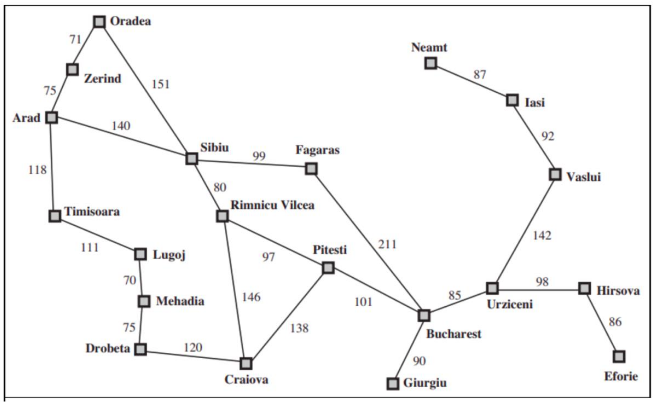

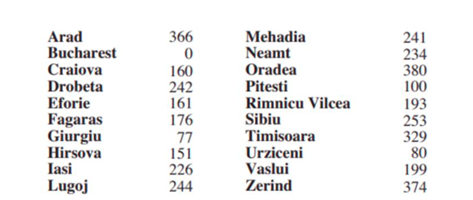

Qn 1) You are given with the map of Romania. An agent has to traverse from Arad to Bucharest. Using A* algorithm find out the shortest path from Arad to Romania with the heuristic information given directly in the table above.

In [ ]:
import heapq
# Romania map edges and distances
graph = {
    'Arad': [('Zerind', 75), ('Sibiu', 140), ('Timisoara', 118)],
    'Zerind': [('Arad', 75), ('Oradea', 71)],
    'Oradea': [('Zerind', 71), ('Sibiu', 151)],
    'Sibiu': [('Arad', 140), ('Oradea', 151), ('Fagaras', 99), ('Rimnicu Vilcea', 80)],
    'Fagaras': [('Sibiu', 99), ('Bucharest', 211)],
    'Rimnicu Vilcea': [('Sibiu', 80), ('Pitesti', 97), ('Craiova', 146)],
    'Timisoara': [('Arad', 118), ('Lugoj', 111)],
    'Lugoj': [('Timisoara', 111), ('Mehadia', 70)],
    'Mehadia': [('Lugoj', 70), ('Drobeta', 75)],
    'Drobeta': [('Mehadia', 75), ('Craiova', 120)],
    'Craiova': [('Drobeta', 120), ('Rimnicu Vilcea', 146), ('Pitesti', 138)],
    'Pitesti': [('Craiova', 138), ('Rimnicu Vilcea', 97), ('Bucharest', 101)],
    'Bucharest': [('Fagaras', 211), ('Pitesti', 101), ('Giurgiu', 90), ('Urziceni', 85)],
    'Giurgiu': [('Bucharest', 90)],
    'Urziceni': [('Bucharest', 85), ('Hirsova', 98), ('Vaslui', 142)],
    'Hirsova': [('Urziceni', 98), ('Eforie', 86)],
    'Eforie': [('Hirsova', 86)],
    'Vaslui': [('Urziceni', 142), ('Iasi', 92)],
    'Iasi': [('Vaslui', 92), ('Neamt', 87)],
    'Neamt': [('Iasi', 87)]
}
# Heuristic table (straight-line distance to Bucharest)
heuristic = {
    'Arad': 366, 'Bucharest': 0, 'Craiova': 160, 'Drobeta': 242,
    'Eforie': 161, 'Fagaras': 176, 'Giurgiu': 77, 'Hirsova': 151,
    'Iasi': 226, 'Lugoj': 244, 'Mehadia': 241, 'Neamt': 234,
    'Oradea': 380, 'Pitesti': 100, 'Rimnicu Vilcea': 193, 'Sibiu': 253,
    'Timisoara': 329, 'Urziceni': 80, 'Vaslui': 199, 'Zerind': 374
}
def a_star_search(graph, heuristic, start, goal):
    open_list = []
    heapq.heappush(open_list, (heuristic[start], 0, start, [start]))
    closed_set = set()
    while open_list:
        f, g, node, path = heapq.heappop(open_list)
        if node == goal:
            return path, g
        closed_set.add(node)
        for neighbor, cost in graph[node]:
            if neighbor not in closed_set:
                new_g = g + cost
                new_f = new_g + heuristic[neighbor]
                heapq.heappush(open_list, (new_f, new_g, neighbor, path + [neighbor]))
    return None, float('inf')

# Run A* search
path, cost = a_star_search(graph, heuristic, 'Arad', 'Bucharest')
print("Shortest path from Arad to Bucharest:", " -> ".join(path))
print("Total cost:", cost)


Shortest path from Arad to Bucharest: Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest
Total cost: 418


Qn 2) Consider four levels of Minimax Algorithm with alternating MIN and MAX player with utility scores 3,4,2,1,7,8,9,10,2,11,1,12,14,9,13,16. Implement minimax algorithm to find the optimal path from the root node.

In [8]:
# Minimax for 4-level binary tree
utilities = [3,4,2,1,7,8,9,10,2,11,1,12,14,9,13,16]

def minimax(depth, idx, is_max, util_arr):
    if depth == 0:
        return util_arr[idx], [idx]
    left_val, left_path = minimax(depth-1, idx*2, not is_max, util_arr)
    right_val, right_path = minimax(depth-1, idx*2+1, not is_max, util_arr)
    if is_max:
        if left_val >= right_val:
            return left_val, [idx] + left_path
        else:
            return right_val, [idx] + right_path
    else:
        if left_val <= right_val:
            return left_val, [idx] + left_path
        else:
            return right_val, [idx] + right_path

# Optimal decision at root
optimal_score, optimal_path = minimax(3, 0, True, utilities)
translated_path = [utilities[i] for i in optimal_path]
print("Optimal path index:", optimal_path)
print("Utility value path:", translated_path)
print("Optimal score:", optimal_score)


Optimal path index: [0, 1, 2, 5]
Utility value path: [3, 4, 2, 8]
Optimal score: 8
